# Confidence intervals

In [13]:
from scipy import stats
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

## Known variance

Experimenting with interval estimates (aka confidence intervals, CI). 
We deal with the case when our measurements are sampled from a normal distribution
$N(\mu, \sigma^2)$.

For simplicity, we start by simplified assumption: we know $\sigma$ in advance and 
only need to find $\mu$. 

The function below gives us a random sample of several independent numbers all of the same distribution. 
This is the place to change if we are to deal with a different kind of random variable. 

In [14]:
def sampleX(sigma, n, theta):
    """
        Returns a sample of n independent values 
        from a normal random variable of standard deviation sigma
        and "unknown" mean theta.
    """
    return stats.norm.rvs(loc=theta, scale=sigma, size=n)

Below are the functions giving the confidence interval.

The first one explicitly

In [28]:
def CI1(x, sigma, alpha):
    """
        Returns the alpha-confidence interval
        based on measurement -- realization -- x.
        (We assume x is a numpy array.)
    """
    n = len(x)
    z = stats.norm.ppf(1-alpha/2)
    a = x.mean() - z*sigma/sqrt(n)
    b = x.mean() + z*sigma/sqrt(n)
    return (a,b)

def CI2(x, sigma, alpha):
    """
        Returns the alpha-confidence interval
        based on measurement -- realization -- x.
        (We assume x is a numpy array.)
    """
    return stats.norm.interval(confidence=1-alpha, 
                              loc=x.mean(),
                              scale=sigma/sqrt(len(x)))    

Exercise part a).

In [30]:
CI1(np.array([2.9]), 1, .05)

(0.9400360154599459, 4.8599639845400535)

In [31]:
CI2(np.array([2.9]), 1, .05)

(0.9400360154599459, 4.8599639845400535)

Value $1.96 = \Phi^{-1}(1-0.025)$ is a good one to remember -- the above interval is: 

In [32]:
2.9-1.96, 2.9+1.96

(0.94, 4.859999999999999)

Exercise part b).

In [33]:
data = np.array([1.82, 1.00, 2.50, 3.00, 0.50, 2.97, 1.76, 1.35, 3.41])

In [35]:
CI1(data, sigma=1, alpha=0.05)

(1.3811231162644266, 2.6877657726244624)

In [36]:
CI2(data, sigma=1, alpha=0.05)

(1.3811231162644266, 2.6877657726244624)

The number 1.96 again ... 

In [37]:
data.mean() - 1.96/3, data.mean() + 1.96/3

(1.3811111111111112, 2.687777777777778)

In [55]:
def CI3(x, alpha):
    """
        Returns the alpha-confidence interval
        based on measurement -- realization -- x.
        (We assume x is a numpy array.)
    """
    n = len(x)
    sigma = x.std(ddof=1)
    z = stats.t.ppf(1-alpha/2, n-1)
    a = x.mean() - z*sigma/sqrt(n)
    b = x.mean() + z*sigma/sqrt(n)
    return (a,b)

def CI4(x, alpha):
    """
        Returns the alpha-confidence interval
        based on measurement -- realization -- x.
        (We assume x is a numpy array.)
    """
    return stats.t.interval(confidence=1-alpha, 
                            df=len(x)-1,
                            loc=x.mean(),
                            scale=stats.sem(x)) 

In [67]:
data2 = np.array([8.47, 10.91, 10.87, 9.46, 10.40])

We compute the mean and standard deviation using numpy. (Which version of the std do we need?)

In [44]:
data2.mean()

10.022

In [65]:
data2.std(ddof=1), data2.std(ddof=0)

(1.0458345949527579, 0.93542289901413)

Pro kontrolu přímočarým pythonem.

In [69]:
m = sum(data2)/len(data2); m

10.022

In [70]:
sqrt(sum([ (x - m)**2 for x in data2])/(len(data2)-1)), sqrt(sum([ (x - m)**2 for x in data2])/len(data2))

(1.0458345949527579, 0.93542289901413)

We will need (estimation) standard deviation of the mean, which is $\sqrt{n}$-times smaller. 
There is also direct function ``stats.sem()`` for this. 

In [73]:
data2.std(ddof=1)/sqrt(len(data2))

0.467711449507065

In [75]:
stats.sem(data2)

0.467711449507065

The following is the confidence interval as discussed in class.

In [46]:
CI3(data2, 0.05)

(8.723424835371143, 11.320575164628858)

In [56]:
CI4(data2, 0.05)

(8.723424835371143, 11.320575164628858)

If we new that ``data2.std(ddof=1)`` is the true standard deviation, we can use the estimate from the first part.
This will get us more precise estimate -- but in will not have the confidence level we want. 

In [76]:
CI1(data2, data2.std(ddof=1), 0.05)

(9.105302403809128, 10.938697596190872)

## Estimates of confidence levels

In [77]:
def estimate_is_correct(interval, theta):
    return interval[0] <= theta <= interval[1]

### First we know the true sigma

In [83]:
theta  = 2.454
correct = 0
alpha = .1
num = 10**4
L = []
D = []
for _ in range(num):
    data = sampleX(2,5,secret)
    D.append(data)
    I = CI1(x=data,sigma=2,alpha=alpha)
    L.append(I)
    if estimate_is_correct(I,theta):
        correct = correct + 1
        
print(f"Correct estimates: {correct}, should be about: {(1-alpha)*num}" )

Correct estimates: 8900, should be about: 9000.0


Now the same think illustrated by a figure: 
each line represents one run of the experiment, plots the interval we obtain from the measurements (green dots).
The red dotted line is the true value of mean.

For the sake of cleaner picture we only take num=10.

<IPython.core.display.Javascript object>


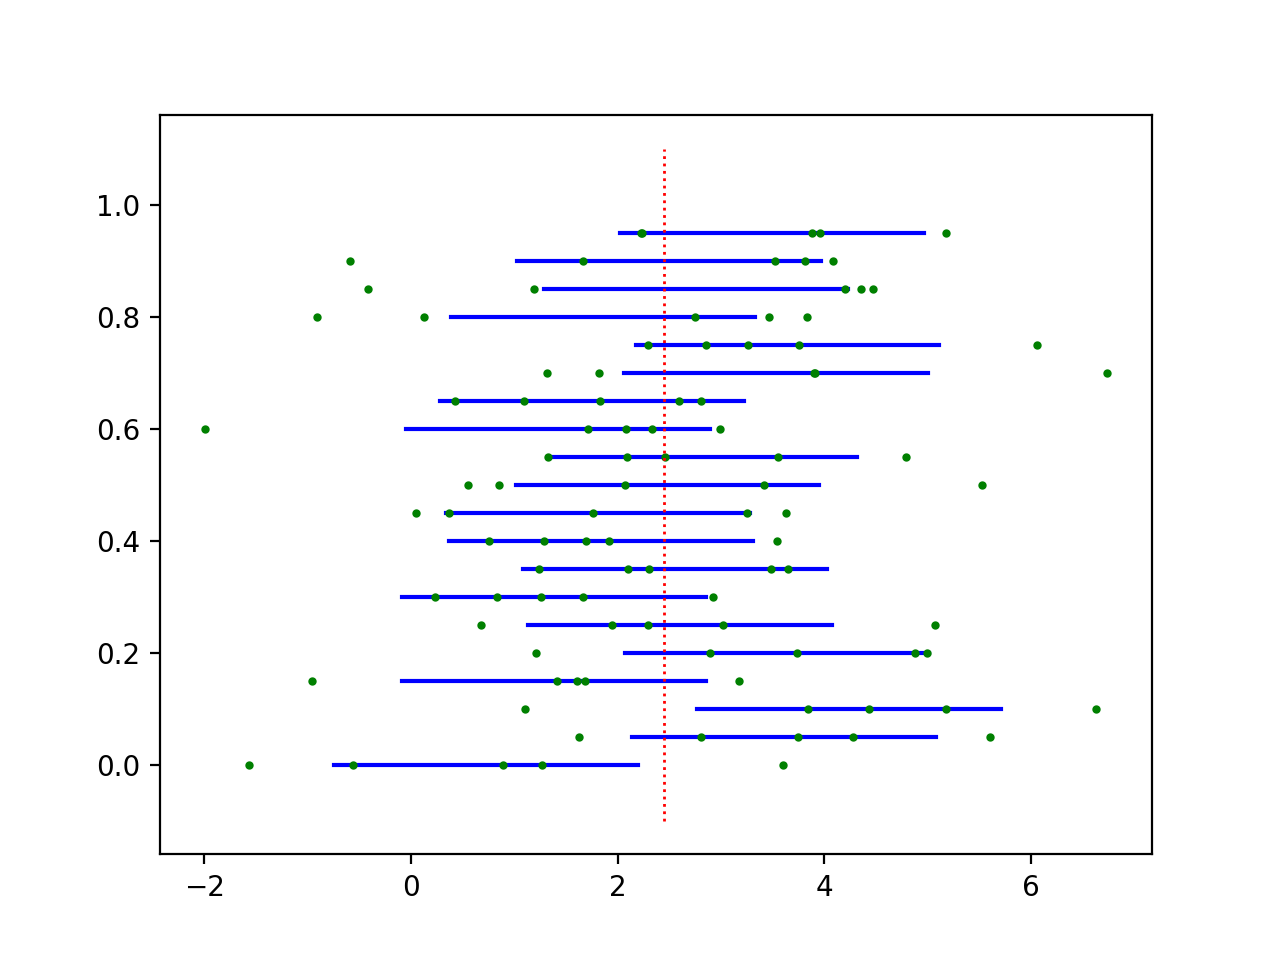

In [46]:
%matplotlib notebook
fig = plt.figure()
num = 20
for i in range(num):
    plt.plot([L[i][0],L[i][1]], [i/num,i/num], 'b-', linewidth=1.5)
    plt.plot(D[i], [i/num for _ in D[i]], 'go', markersize=2)

plt.plot([secret, secret], [-0.1, 1.1], 'r:', linewidth=1)

plt.show()

### Now we don't know it, but use the same method

We ask for confidence level 90 % but get only 82 %.
(Here we have $n=5$ samples, with more samples the difference would be smaller.)

In [100]:
theta  = 2.454
correct = 0
alpha = .1
num = 10**4

for _ in range(num):
    data = sampleX(2,5,theta)
    I = CI1(x=data,sigma=data.std(ddof=1),alpha=alpha)
    if estimate_is_correct(I,theta):
        correct = correct + 1
        
print(f"Correct estimates: {correct}, should be about: {(1-alpha)*num}" )

Correct estimates: 8237, should be about: 9000.0


### Finally, we use the Student t function


In [102]:
theta  = 2.454
correct = 0
alpha = .1
num = 10**4

for _ in range(num):
    data = sampleX(2,5,theta)
    I = CI3(x=data,alpha=alpha)
    if estimate_is_correct(I,theta):
        correct = correct + 1
        
print(f"Correct estimates: {correct}, should be about: {(1-alpha)*num}" )

Correct estimates: 9028, should be about: 9000.0
